In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    PrecisionRecallDisplay,
)
import keras
from keras import preprocessing
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from tensorflow.keras import layers
import tensorflow as tf

## Data loading

In [2]:
df = pd.read_csv('click_data.csv')

In [3]:
df

,event_click,ad_id,publisher_place_type,publisher_website,ci_image_cat,ci_text_cat,publisher_place_group_type,EventDate,date,visitor_session_id,visitor_device,visitor_device_os,visitor_country,visitor_region,visitor_browser,publisher_place_id
0,0,1693485468,Just Banner,popcornnews.ru,['0'],['11'],Just Banner,2023-08-31,2023-08-31 17:03:02+03:00,2890dd55-0a37-4975-af15-e3c54fc4c0f2,Mobile,iOS,RU,Bryanskaya oblast,Safari,635bc1911e2b546885a37ec3
1,0,1691583125,Just Banner,yaplakal.com,['0'],['11'],Just Banner,2023-08-30,2023-08-30 00:04:40+03:00,c342ad4f-0ad7-4638-a0ce-d916152a59f9,Desktop,Windows,RU,Moskovskaya oblast,Chrome,63fddeae6edefd2517e8cc2f
2,0,1692811008,Just Banner,vokrug.tv,['0'],['11'],Just Banner,2023-08-30,2023-08-30 07:32:19+03:00,8bb0fd0f-ac3c-40af-8910-8e45ace4438f,Mobile,Android,RU,Moskva,Chrome,635905586bbec9d50a81aa02
3,0,1693479582,Just Banner,starhit.ru,['0'],['11'],Just Banner,2023-08-31,2023-08-31 14:49:08+03:00,4c3c8956-2614-4414-ba5c-4afe68e4597c,Mobile,iOS,RU,Tatarstan Respublika,Safari,633d43a60601f31045e72a7d
4,0,1690896125,Just Banner,kinoafisha.info,['0'],"['1', '11', '211']",Just Banner,2023-08-30,2023-08-30 03:44:20+03:00,47abb888-6742-4cef-ba73-ac6a0afeb666,Mobile,Android,RU,YamaloNenetskiy avtonomnyy okrug,Chrome,6359204c1e2b546885a37e83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94939,0,1693555201,Just Banner,el-montage.ru,['0'],['11'],Just Banner,2023-09-01,2023-09-01 16:39:52+03:00,f3fe2d01-5045-47b7-9486-4d80e5b3e5b6,Mobile,Android,RU,Altayskiy kray,Chrome,646b4b54475a23c8614fc02c
94940,0,1693308334,Just Banner,kinoafisha.info,['0'],"['1', '13']",Just Banner,2023-08-30,2023-08-30 23:49:16+03:00,9a27a14a-025b-4f2e-8837-abdbfb402e5b,Mobile,Android,RU,Krasnodarskiy kray,Chrome,635bbdfd1e2b546885a37ebb
94941,0,1692022985,Just Banner,el-montage.ru,['0'],['11'],Just Banner,2023-08-30,2023-08-30 07:32:12+03:00,80691311-64d7-4f30-9526-23decd34f65e,Mobile,Android,RU,Samarskaya oblast,Chrome,646b4b54475a23c8614fc02c
94942,1,1693151817,Just Banner,7days.ru,['0'],['11'],Just Banner,2023-09-02,2023-09-02 20:49:27+03:00,febddaf6-1416-4811-973c-45c738233ca9,Mobile,Android,RU,SanktPeterburg,Chrome,63590ab66bbec9d50a81aa08


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94944 entries, 0 to 94943
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   event_click                 94944 non-null  int64 
 1   ad_id                       94944 non-null  int64 
 2   publisher_place_type        94944 non-null  object
 3   publisher_website           94944 non-null  object
 4   ci_image_cat                94944 non-null  object
 5   ci_text_cat                 94944 non-null  object
 6   publisher_place_group_type  94944 non-null  object
 7   EventDate                   94944 non-null  object
 8   date                        94944 non-null  object
 9   visitor_session_id          94944 non-null  object
 10  visitor_device              94944 non-null  object
 11  visitor_device_os           94944 non-null  object
 12  visitor_country             94944 non-null  object
 13  visitor_region              94930 non-null  ob

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.isnull().sum()

event_click                    0
ad_id                          0
publisher_place_type           0
publisher_website              0
ci_image_cat                   0
ci_text_cat                    0
publisher_place_group_type     0
EventDate                      0
date                           0
visitor_session_id             0
visitor_device                 0
visitor_device_os              0
visitor_country                0
visitor_region                14
visitor_browser                0
publisher_place_id             0
dtype: int64

#### there are empty rows in the column visitor_region. let's fill them with the most common region - Moskovskaya oblast

In [7]:
df.visitor_region.value_counts() 

visitor_region
Moskovskaya oblast            9510
Sverdlovskaya oblast          5266
Krasnodarskiy kray            5263
SanktPeterburg                4263
Moskva                        4009
                              ... 
Altay Respublika                44
Tyva Respublika                 38
Magadanskaya oblast             34
Ingushetiya Respublika          16
Nenetskiy avtonomnyy okrug      11
Name: count, Length: 83, dtype: int64

In [8]:
values = {"visitor_region": "Moskovskaya oblast"}
df = df.fillna(value=values)

In [9]:
df.visitor_region.isnull().sum()

0

#### look at the distribution of clicks

event_click
0    79120
1    15824
Name: count, dtype: int64


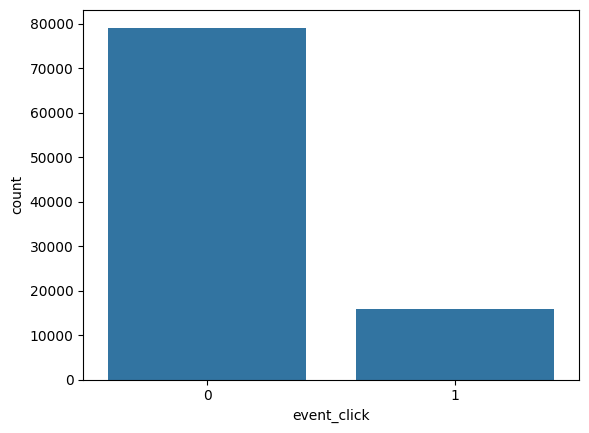

In [10]:
print(df.event_click.value_counts())
plt.figure()
sns.countplot(x='event_click', data=df)
plt.show()

#### data is unbalanced, so we won't use the accuracy metric in the evaluation

In [11]:
print(len(df.ad_id.unique()))  
df.ad_id.value_counts()

113


ad_id
1693555201    7762
1693485468    5473
1692032000    3915
1692956708    3567
1693316580    3142
              ... 
1693564479       1
1692201987       1
1693487419       1
1693582832       1
1693238128       1
Name: count, Length: 113, dtype: int64

#### We will not use the ad_id column, since it does not affect the separability of the data

In [12]:
df.publisher_place_type.value_counts() #delete this column

publisher_place_type
Just Banner               94943
Astra Native Resizable        1
Name: count, dtype: int64

### publisher_place_type will also not be used, since there are only 2 unique values in the column, and one of them is in a single copy. the column does not carry important information

### information on the number of unique publisher websites (there are 320 of them):

In [13]:
df.publisher_website.value_counts()

publisher_website
yaplakal.com       13396
fotostrana.ru       7992
sportbox.ru         6584
kinoafisha.info     6424
7days.ru            5542
                   ...  
turktv.me              1
flarix.tv              1
animego.today          1
turkcinema.one         1
rserials.online        1
Name: count, Length: 320, dtype: int64

In [14]:
df.ci_image_cat.value_counts()

ci_image_cat
['0']    94944
Name: count, dtype: int64

#### the image category information is also useless as it contains only one unique element

In [15]:
df.ci_text_cat.unique()

array(["['11']", "['1', '11', '211']", "['1', '11']", "['1', '10']",
       "['1', '13']", "['11', '211']", "['11', '213']",
       "['2200', '11', '220']", "['1', '11', '220']",
       "['1', '10', '211']", "['2042', '11', '204']",
       "['2000', '11', '200']", "['11', '220', '22015']",
       "['200', '1', '11', '2006']", "['11', '220']",
       "['1', '11', '213']", "['2200', '1', '11', '220']",
       "['11', '220', '2206']", "['1', '11', '204']",
       "['11', '2060', '206']", "['11', '3']", "['1', '10', '213']",
       "['11', '204']", "['1', '10', '220', '22015']",
       "['1', '11', '206']", "['200', '11']", "['1', '10', '220']",
       "['1', '11', '2060', '206']", "['1', '11', '220', '22015']",
       "['200', '11', '2000']", "['2000', '1', '11', '200']",
       "['11', '220', '22023']", "['200', '1', '11']",
       "['200', '1', '11', '2004']", "['1', '11', '220', '2206']",
       "['1', '21700', '21701', '2120', '201', '11', '206', '2190', '207', '212', '213', '217', '2

#### information about text categories is the main one in the dataset

In [16]:
df.publisher_place_group_type.value_counts()  

publisher_place_group_type
Just Banner    94944
Name: count, dtype: int64

#### publisher_place_group_type is also useless - only one signle value

In [17]:
df.visitor_session_id.value_counts()

visitor_session_id
1d2a3c44-835c-4a88-b5ef-3d875dece960    4
a483da4d-9199-49a0-b336-881e045722d8    4
0e37917d-0893-47ad-941c-75373a9ee523    3
d3d172b0-035c-45af-bde2-c1cd62861afd    3
13adbfc3-c655-458e-8b08-3f5747fc4600    3
                                       ..
814079ab-fcdc-418a-aca3-9980bd5f47d7    1
fa56aab2-d8d8-4a86-abac-71470889a996    1
259fcb41-aba0-4c20-83a9-b887bbf1dc50    1
dcd2d70a-947f-477a-9a5f-c26d24b5f2ca    1
78370ba3-6f07-4234-9afa-77f8029ec1d0    1
Name: count, Length: 94853, dtype: int64

In [18]:
print(len(df.publisher_place_id.unique())) 
df.publisher_place_id.value_counts() 

979


publisher_place_id
64ba2897eba230053d6bbfde    6684
63590ab66bbec9d50a81aa08    5542
63fddf966edefd2517e8cc35    4127
635bbdfd1e2b546885a37ebb    3909
64705d537956e2692add2c8b    3458
                            ... 
63776881d43c1010d49d048b       1
633c34f20601f31045e72a70       1
635a3cd61e2b546885a37ea7       1
64819d428dc2ca0395d87711       1
63fdddd56edefd2517e8cc2a       1
Name: count, Length: 979, dtype: int64

#### visitor_session_id and publisher_place_id does not contain important information

In [19]:
df.visitor_device.value_counts()

visitor_device
Mobile     84914
Desktop     9582
Tablet       448
Name: count, dtype: int64

In [20]:
df.visitor_device_os.value_counts()

visitor_device_os
Android     72132
iOS         13230
Windows      9029
Linux         281
macOS         271
ChromeOS        1
Name: count, dtype: int64

In [21]:
df.visitor_country.value_counts() 

visitor_country
RU    94944
Name: count, dtype: int64

#### country onle one - delete info

In [22]:
df.visitor_browser.value_counts()

visitor_browser
Chrome              74458
Safari              12467
YaBrowser            3002
Samsung Browser      2113
Opera                1381
Edge                 1018
Huawei Browser        352
iPhone                 31
[Pinterest             31
Opera Touch            28
Atom                   18
[FBAN                  15
Firefox                10
XiaoMi                 10
SberBrowser             3
iPad                    2
SmartTV                 2
SputnikBrowser          1
FSWebApp                1
Elements Browser        1
Name: count, dtype: int64

#### remove useless columns:

In [23]:
DF = df.drop(columns=['ad_id','publisher_place_type','ci_image_cat', 'publisher_place_group_type',
       'visitor_session_id', 'visitor_country','publisher_place_id','EventDate','date'],axis=1)

In [24]:
DF

,event_click,publisher_website,ci_text_cat,visitor_device,visitor_device_os,visitor_region,visitor_browser
0,0,popcornnews.ru,['11'],Mobile,iOS,Bryanskaya oblast,Safari
1,0,yaplakal.com,['11'],Desktop,Windows,Moskovskaya oblast,Chrome
2,0,vokrug.tv,['11'],Mobile,Android,Moskva,Chrome
3,0,starhit.ru,['11'],Mobile,iOS,Tatarstan Respublika,Safari
4,0,kinoafisha.info,"['1', '11', '211']",Mobile,Android,YamaloNenetskiy avtonomnyy okrug,Chrome
...,...,...,...,...,...,...,...
94939,0,el-montage.ru,['11'],Mobile,Android,Altayskiy kray,Chrome
94940,0,kinoafisha.info,"['1', '13']",Mobile,Android,Krasnodarskiy kray,Chrome
94941,0,el-montage.ru,['11'],Mobile,Android,Samarskaya oblast,Chrome
94942,1,7days.ru,['11'],Mobile,Android,SanktPeterburg,Chrome


#### add columns with day of the week and hour, since this information can be useful when predicting a click - whether the visitor is watching the ad on a weekday or a weekend, and in what period of the day

In [25]:
DF['week_day'] = df['date'].dt.dayofweek
DF['hour'] = df['date'].dt.hour

## Label encoding

In [26]:
def label_encoder(l):
    le = LabelEncoder()
    le.fit(l)
    print(le.classes_)
    return(le.transform(l))

In [27]:
obj_cols = DF.select_dtypes(include=['object']).columns.drop('ci_text_cat')

In [28]:
obj_cols

Index(['publisher_website', 'visitor_device', 'visitor_device_os',
       'visitor_region', 'visitor_browser'],
      dtype='object')

In [29]:
for col in obj_cols:
    print(col)
    DF[col] = label_encoder(DF[col])
    print('----')

publisher_website
['100biografiy.ru' '101.ru' '116.ru' '123film.pro' '161.ru' '1oknn.ru'
 '29.ru' '3-lordserials.xyz' '45.ru' '4lordserials.xyz' '4x4top.ru'
 '59.ru' '63.ru' '72.ru' '74.ru' '76.ru' '7days.ru' '7kub.ru' '93.ru'
 '9look.ru' '9sam.ru' 'aif.ru' 'akniga.org' 'akvauyut.ru'
 'all-aforizmy.ru' 'all-library.ru' 'allcarz.ru' 'allroutes.ru'
 'allserial.top' 'allya.ru' 'amerikanskiy-papasha.ru' 'animego.today'
 'anwapp.org' 'atcyasenevo.ru' 'autonevod.ru' 'autosport.com.ru'
 'autotak.ru' 'avtika.ru' 'avtonov.com' 'badlady.ru' 'be5.biz' 'benams.ru'
 'beston.market' 'bibliovk.com' 'biografpro.ru'
 'bodybuilding-and-fitness.ru' 'bonnycards.ru' 'bookscafe.net'
 'booksprime.ru' 'briefly.ru' 'budu5.com' 'burdastyle.ru' 'burn-soft.ru'
 'calc.ru' 'carmen62.ru' 'cash-droid.ru' 'catshere.ru' 'cheat-game.ru'
 'chefshows.ru' 'chistotnik.ru' 'chita.ru' 'chitat-knigi.com' 'cleany.biz'
 'cn-fan.tv' 'comp-security.net' 'coralreef-aqua.ru' 'deepcloud.ru'
 'design-homes.ru' 'doctorpiter.ru' 'dom-dr

In [30]:
DF

,event_click,publisher_website,ci_text_cat,visitor_device,visitor_device_os,visitor_region,visitor_browser,week_day,hour
0,0,206,['11'],1,4,8,9,3,17
1,0,316,['11'],0,3,41,1,2,0
2,0,301,['11'],1,0,42,1,2,7
3,0,249,['11'],1,4,67,9,3,14
4,0,114,"['1', '11', '211']",1,0,79,1,2,3
...,...,...,...,...,...,...,...,...,...
94939,0,78,['11'],1,0,2,1,4,16
94940,0,114,"['1', '13']",1,0,32,1,2,23
94941,0,78,['11'],1,0,59,1,2,7
94942,1,16,['11'],1,0,60,1,5,20


In [31]:
# convert the data in the "ci_text_cat" column from strings to lists
import re
def str_to_list(st):
    regex = re.compile('[^0-9,]') 
    st = regex.sub('', st) # remove everything except numbers and commas
    return [int(x) for x in list(st.split(","))] # return a list of integers

In [32]:
DF['ci_text_cat'] = list(map(str_to_list,DF['ci_text_cat']))

In [33]:
# convert column ci_text_cat to multiple columns (analogue of OneHotEncoder for lists)
mlb = MultiLabelBinarizer(sparse_output=True)

DF = DF.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(DF.pop('ci_text_cat')),
                index=DF.index,
                columns=mlb.classes_))

In [34]:
DF

,event_click,publisher_website,visitor_device,visitor_device_os,visitor_region,visitor_browser,week_day,hour,1,3,...,2190,2200,2206,21000,21001,21700,21701,22015,22016,22023
0,0,206,1,4,8,9,3,17,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,316,0,3,41,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,301,1,0,42,1,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,249,1,4,67,9,3,14,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,114,1,0,79,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94939,0,78,1,0,2,1,4,16,0,0,...,0,0,0,0,0,0,0,0,0,0
94940,0,114,1,0,32,1,2,23,1,0,...,0,0,0,0,0,0,0,0,0,0
94941,0,78,1,0,59,1,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
94942,1,16,1,0,60,1,5,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
DF.columns = DF.columns.map(str)

## Scaling

#### to prevent larger numbers from having more weight when building models, scale all data to numbers from the interval [0,1]

In [36]:
DF = pd.DataFrame(MinMaxScaler().fit_transform(DF),columns=DF.columns)

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [37]:
DF

,event_click,publisher_website,visitor_device,visitor_device_os,visitor_region,visitor_browser,week_day,hour,1,3,...,2190,2200,2206,21000,21001,21700,21701,22015,22016,22023
0,0.0,0.645768,0.5,0.8,0.097561,0.473684,0.500000,0.739130,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.990596,0.0,0.6,0.500000,0.052632,0.333333,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.943574,0.5,0.0,0.512195,0.052632,0.333333,0.304348,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.780564,0.5,0.8,0.817073,0.473684,0.500000,0.608696,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.357367,0.5,0.0,0.963415,0.052632,0.333333,0.130435,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94939,0.0,0.244514,0.5,0.0,0.024390,0.052632,0.666667,0.695652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94940,0.0,0.357367,0.5,0.0,0.390244,0.052632,0.333333,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94941,0.0,0.244514,0.5,0.0,0.719512,0.052632,0.333333,0.304348,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94942,1.0,0.050157,0.5,0.0,0.731707,0.052632,0.833333,0.869565,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### a diagram of clicks depending on days of the week:

<Axes: xlabel='week_day', ylabel='count'>

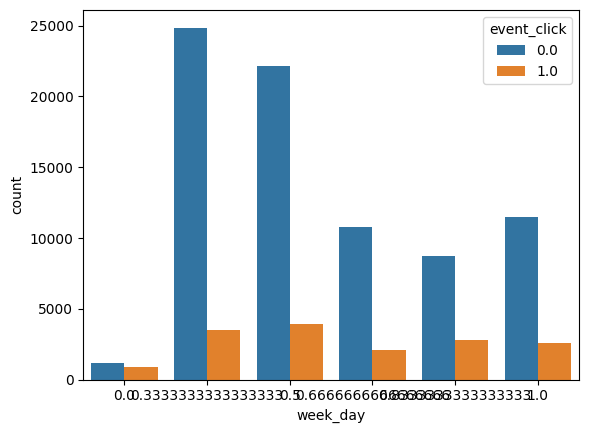

In [38]:
sns.countplot(x='week_day',hue='event_click',data=DF)

#### on the first day of the week the probability of clicks is much higher

#### diagram of clicks depend on days of the week:

<Axes: xlabel='hour', ylabel='count'>

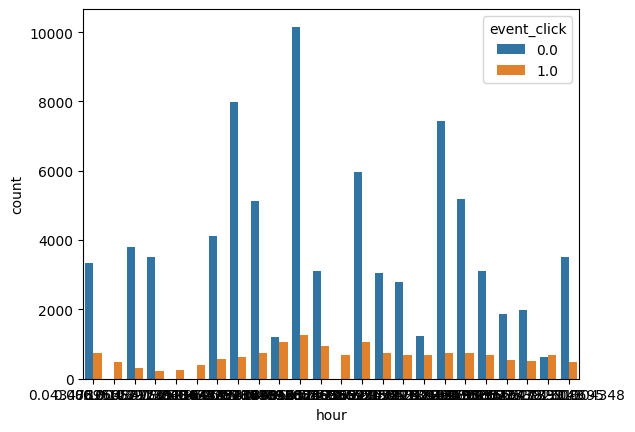

In [39]:
sns.countplot(x='hour',hue='event_click',data=DF)

#### there are much more clicks at certain hours

#### the correlation of variables (heat map):

In [40]:
corr = DF[['publisher_website', 'visitor_device',
       'visitor_device_os', 'visitor_region', 'visitor_browser', 'week_day',
       'hour', '1', '3', '10']].corr()

Text(0.5, 1.05, 'Pearson correlation of Features')

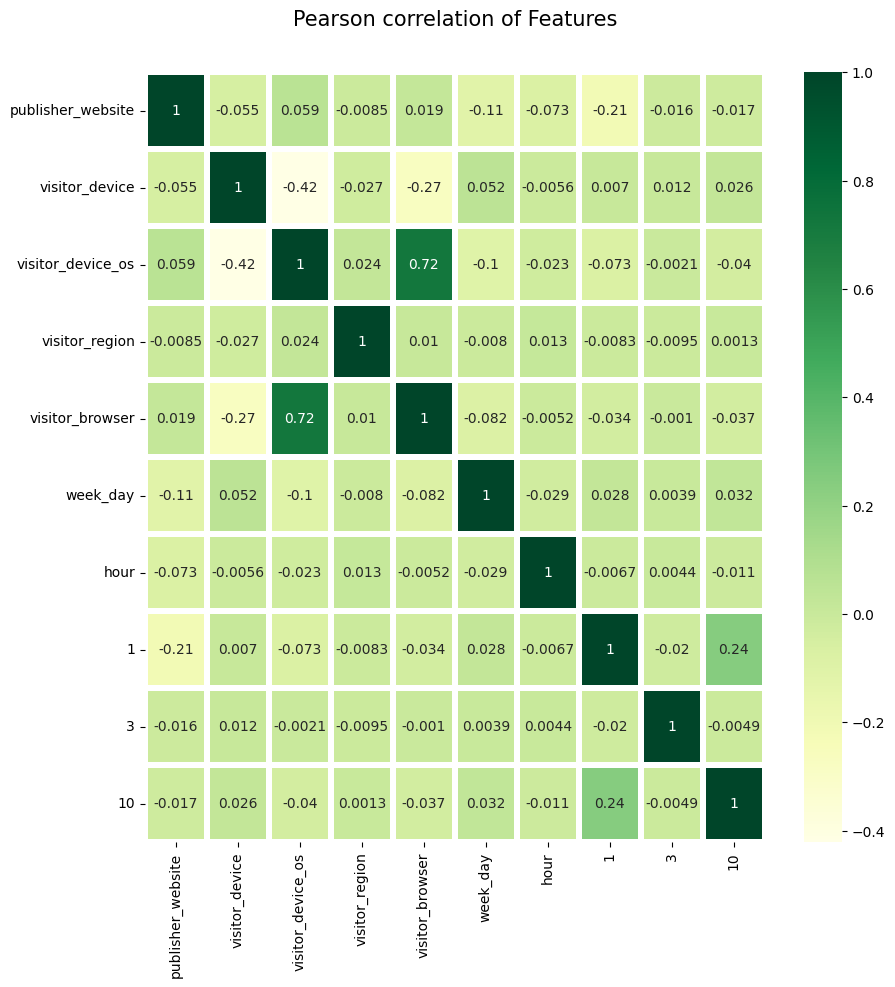

In [41]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

In [42]:
DF.columns

Index(['event_click', 'publisher_website', 'visitor_device',
       'visitor_device_os', 'visitor_region', 'visitor_browser', 'week_day',
       'hour', '1', '3', '10', '11', '13', '200', '201', '204', '206', '207',
       '210', '211', '212', '213', '217', '219', '220', '2000', '2003', '2004',
       '2006', '2042', '2060', '2100', '2120', '2170', '2190', '2200', '2206',
       '21000', '21001', '21700', '21701', '22015', '22016', '22023'],
      dtype='object')

## Split into train and test samples

In [43]:
X = DF.drop(columns=['event_click'],axis=1)
y = DF['event_click']

In [44]:
X.shape

(94944, 43)

In [45]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)
print(X_train.shape, X_test.shape)

(85449, 43) (9495, 43)


## Models building

#### method for models evaluation

In [46]:
def print_metrics(y_test,y_pred,y_pred_prob):
    print(f"Recall score {recall_score(y_test, y_pred)}")
    print(f"Precision score {precision_score(y_test, y_pred)}")
    print(f"f1 score {f1_score(y_test, y_pred)}")
    print(f"ROC AUC {roc_auc_score(y_test, y_pred_prob)}")
    print(f"Confusion matrix \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report \n{classification_report(y_test, y_pred)}")

## 1. Logistic Regression

In [47]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\natal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_pred_lr = model.predict(X_test)
y_pred_prob_lr = model.predict_proba(X_test)[:,1]

In [49]:
print_metrics(y_test,y_pred_lr,y_pred_prob_lr)

Recall score 0.0006321112515802782
Precision score 0.5
f1 score 0.0012626262626262627
ROC AUC 0.688477753406475
Confusion matrix 
 [[7912    1]
 [1581    1]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      7913
         1.0       0.50      0.00      0.00      1582

    accuracy                           0.83      9495
   macro avg       0.67      0.50      0.46      9495
weighted avg       0.78      0.83      0.76      9495



#### the model marks almost all elements with zeros. let's train a neural network

## 2. Neural network

In [50]:
inputs = keras.Input(shape=(X_train.shape[1],1))
x = layers.BatchNormalization()(inputs)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="classification-model")
model.summary()

Model: "classification-model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 43, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 43, 1)               │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 43, 1024)            │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43, 512)             │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43, 64)              │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43, 16)              │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 688)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 688)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             689 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561,413 (2.14 MB)

 Trainable params: 561,411 (2.14 MB)

 Non-trainable params: 2 (8.00 B)

In [51]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [52]:
model.compile(loss='mse',optimizer=optimizer,metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [53]:
fit_results = model.fit(x=X_train,y=y_train,epochs=100,validation_split=0.2)

Epoch 1/100
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - loss: 0.1399 - precision: 0.3602 - recall: 0.0075 - val_loss: 0.1249 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - loss: 0.1250 - precision: 0.6154 - recall: 0.0577 - val_loss: 0.1229 - val_precision: 0.8519 - val_recall: 0.0322
Epoch 3/100
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 66s 31ms/step - loss: 0.1227 - precision: 0.6160 - recall: 0.1490 - val_loss: 0.1228 - val_precision: 0.8545 - val_recall: 0.0329
Epoch 4/100
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - loss: 0.1200 - precision: 0.6609 - recall: 0.1916 - val_loss: 0.1187 - val_precision: 0.7025 - val_recall: 0.3062
Epoch 5/100
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 68s 32ms/step - loss: 0.1200 - precision: 0.7025 - recall: 0.2446 - val_loss: 0.1189 - val_precision: 0.6766 - val_recall: 0.1674
Epoch 6/100
2137/2137 ━━━━━━━━━━━━━━━━━━━━ 70s 33ms/step - loss: 0.1155 - precision: 0.7224 - recall: 0.2734 - val_loss: 0.1126

In [54]:
y_pred_prob_cnn = model.predict(X_test)

297/297 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [55]:
y_pred_cnn = list(map(lambda i: 1 if i>= 0.5 else 0,y_pred_prob_cnn))

In [56]:
print_metrics(y_test,y_pred_cnn,y_pred_prob_cnn)

Recall score 0.3552465233881163
Precision score 0.8659476117103235
f1 score 0.5038099506947556
ROC AUC 0.7867279563482965
Confusion matrix 
 [[7826   87]
 [1020  562]]
Classification report 
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      7913
         1.0       0.87      0.36      0.50      1582

    accuracy                           0.88      9495
   macro avg       0.88      0.67      0.72      9495
weighted avg       0.88      0.88      0.86      9495



## Conclusion

#### neural network results are better than logistic regression results
#### we have high precision of 87% and low recall of 36%, that is, we have a high decision threshold - we mark 0 again # instead of making an extra mistake by marking 1 (FN is less important for us than FP, therefore the more important metric is precision)